In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
xlsx = pd.ExcelFile('scc_election.xlsx')

In [3]:
table_of_contents = pd.read_excel(xlsx, 0, skiprows=3)

In [4]:
scc_primary = {}
for i, name in enumerate(table_of_contents['Contest']):
    if i == 0:
        scc_primary['{}'.format(str(name))] = pd.read_excel(xlsx, i+1)
    else:
        scc_primary['{}'.format(str(name))] = pd.read_excel(xlsx, i+1, header=[0,1])

In [5]:
mean_find = scc_primary['Registered Voters']
mean_find.drop(scc_primary['Registered Voters'].tail(1).index,inplace=True)
print np.average(mean_find['Registered Voters'])

856.506072874


In [6]:
reg_vote_min = 1340
sig_turnout = scc_primary['Registered Voters'][scc_primary['Registered Voters']['Registered Voters']>reg_vote_min].dropna()
sig_turnout.drop(sig_turnout.tail(1).index,inplace=True)
sig_turnout.set_index('County')

sig_turnout['Voter Turnout'] = [float(str(i).strip('%')) for i in sig_turnout['Voter Turnout']]
print "There are {} precincts with over {} registered voters.".format(len(sig_turnout), reg_vote_min)
sig_turnout.head()

There are 48 precincts with over 1340 registered voters.


,County,Registered Voters,Ballots Cast,Voter Turnout
25,PCT 1046,1347,404,29.99
77,PCT 1156,1358,392,28.87
84,PCT 1200,1374,379,27.58
110,PCT 1238,1369,197,14.39
177,PCT 1391,1347,270,20.04


In [7]:
sig_turnout_gov = sig_turnout.join(scc_primary['GOVERNOR (Vote For 1)'],
                                   on='County', how='left')
sig_turnout_gov['Percent Cox'] = sig_turnout_gov['REP - JOHN H. COX', 'Total Votes'] / sig_turnout_gov['Ballots Cast']

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [8]:
ind_sorted = sig_turnout_gov['Voter Turnout'].sort_values().index
colors_ind_sorted = [sig_turnout_gov['Percent Cox'][i] for i in ind_sorted]

cox_norm = sig_turnout_gov['Percent Cox'] / max(sig_turnout_gov['Percent Cox'])
cox_norm_sorted = colors_ind_sorted / max(sig_turnout_gov['Percent Cox'])

color = cm.coolwarm(cox_norm)
color_sorted = cm.coolwarm(cox_norm_sorted)

print max(sig_turnout_gov['Percent Cox'])
print min(sig_turnout_gov['Percent Cox'])

0.245098039216
0.0555555555556


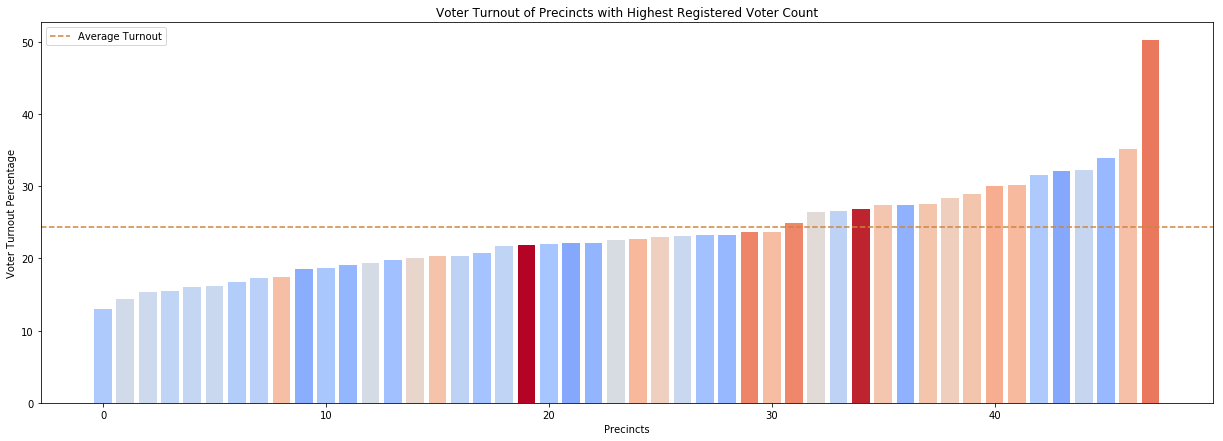

In [9]:
fig, ax = plt.subplots(figsize=(21,7))
plt.bar(range(len(sig_turnout_gov)),
        sig_turnout_gov['Voter Turnout'].sort_values(),
        color=color_sorted)
plt.axhline(24.32, ls='dashed', c='peru', label='Average Turnout')
plt.legend(loc='best')

plt.title('Voter Turnout of Precincts with Highest Registered Voter Count')
plt.xlabel('Precincts')
plt.ylabel('Voter Turnout Percentage')
# plt.xticks(range(len(sig_turnout)),sig_turnout['County'], rotation=45)

plt.show()

In [22]:
result = 0

In [99]:
result = result + 10
print result

220


1


In [12]:
print range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [20]:
for number in [1,6,3,10,2]:
    print (number)

1
6
3
10
2
